In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [2]:
bank = pd.read_csv("bank_full_w_dummy_vars.csv")
X = bank.iloc[:,[18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]
y = bank.iloc[:,17]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 19), (9043, 19), (36168,), (9043,))

In [74]:
knn1 = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn1, X, y, cv=10, scoring='accuracy')
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)
print(scores.mean())

0.84910925119


In [75]:
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.90      0.92      0.91      7993
          1       0.24      0.19      0.21      1050

avg / total       0.82      0.84      0.83      9043

0.838217405728


In [76]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93      7993
          1       0.41      0.22      0.29      1050

avg / total       0.85      0.87      0.86      9043

0.872055733717


In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred3 = lr.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      7993
          1       0.65      0.18      0.28      1050

avg / total       0.87      0.89      0.87      9043

0.89350879133


In [34]:
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
    k_scores.append(scores.mean())

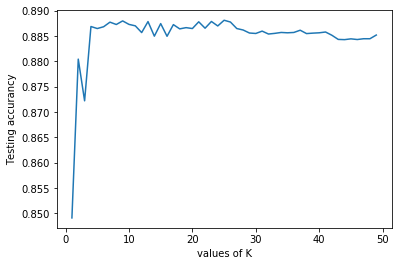

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores, )
plt.xlabel('values of K')
plt.ylabel('Testing accurancy')

In [5]:
knn3 = KNeighborsClassifier(n_neighbors=8)
knn3.fit(X_train, y_train)
y_pred4 = knn3.predict(X_test)
print(cross_val_score(knn3, X, y, cv=10, scoring='roc_auc').mean())

0.576920969495


In [6]:
print(classification_report(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94      7993
          1       0.57      0.16      0.25      1050

avg / total       0.86      0.89      0.86      9043

0.888311401084


In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred3 = lr.predict(X_test)
print(cross_val_score(lr, X, y, cv=10, scoring='roc_auc').mean())

0.697805223915


In [8]:
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      7993
          1       0.65      0.18      0.28      1050

avg / total       0.87      0.89      0.87      9043

0.89350879133


In [9]:
new_user = [[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]
y_final = knn3.predict(new_user)
y_final

array([0], dtype=int64)

In [10]:
new_user = [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]
y_final = lr.predict(new_user)
y_final

array([0], dtype=int64)